In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "EXVO"
coin_per_block = 3.8
our_nethash = 1600000000

# coin = "RVN"
# coin = "PGN"
# coin = "LUX"
# coin = "PROTON"
# coin = "RDEN"

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 47486


In [7]:
df.head(5)

,difficulty,height,nonce,time,date
0,167.806517,47486.0,5.906630e+08,1.525645e+09,2018-05-06 22:20:53
1,243.260690,47485.0,1.877295e+09,1.525645e+09,2018-05-06 22:20:52
2,282.188620,47484.0,1.471564e+09,1.525645e+09,2018-05-06 22:17:21
3,276.696848,47483.0,3.500436e+09,1.525645e+09,2018-05-06 22:09:59
4,229.859155,47482.0,3.798218e+09,1.525644e+09,2018-05-06 22:07:11


In [8]:
df_block_rate = df[['height','time']]
df_block_rate.head(3)

,height,time
0,47486.0,1.525645e+09
1,47485.0,1.525645e+09
2,47484.0,1.525645e+09


In [9]:
MA_window = min(400, int((df_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 400


In [10]:
df_block_rate.count()

height    2000
time      2000
dtype: int64

In [11]:
df_block_rate = df_block_rate.diff(-MA_window)
df_block_rate.head(5)

,height,time
0,400.0,25963.0
1,400.0,26025.0
2,400.0,26013.0
3,400.0,25625.0
4,400.0,25613.0


In [12]:
df_block_rate['block_per_day']=df_block_rate['height']/df_block_rate['time']*3600*24

In [13]:
df_block_rate.head(5)

,height,time,block_per_day
0,400.0,25963.0,1331.125063
1,400.0,26025.0,1327.953890
2,400.0,26013.0,1328.566486
3,400.0,25625.0,1348.682927
4,400.0,25613.0,1349.314801


In [14]:
df_block_rate_count = df_block_rate.count()[0]
print(df_block_rate_count)

1600


In [15]:
df_block_rate_full = pd.concat([df["height"].head(df_block_rate_count), df_block_rate['block_per_day']],axis=1)

In [16]:
df_block_rate_full.head(3)

,height,block_per_day
0,47486.0,1331.125063
1,47485.0,1327.953890
2,47484.0,1328.566486


In [17]:
block_speed_latest = int(df_block_rate['block_per_day'][0])

In [18]:
print("Coin [{}] Block Speed is {} Blocks/Day".format(coin, block_speed_latest))

Coin [EXVO] Block Speed is 1331 Blocks/Day


In [19]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [20]:
df_nethash = pd.read_csv(fname)

In [21]:
print("Number of Nethash Sample: {}".format(df_nethash.count()[0]))

Number of Nethash Sample: 1047


In [22]:
print("Latest Block: {}".format(int(df_nethash["height"][0])))

Latest Block: 47499


In [23]:
df_nethash.head(5)

,height,nethash
0,47499,12929832371
1,47497,12909181439
2,47495,12983681736
3,47490,13207777615
4,47489,13219237392


In [24]:
df_nethash_block = pd.merge(df_block_rate_full, df_nethash, how='inner', on='height')

In [25]:
df_nethash_block.head(3)

,height,block_per_day,nethash
0,47486,1331.125063,13646688713
1,47484,1328.566486,13785375286
2,47483,1348.682927,14471699187


In [26]:
df_nethash_block["profit"]=df_nethash_block["block_per_day"]*our_nethash/df_nethash_block["nethash"]*coin_per_block
df_nethash_block_profit = df_nethash_block

In [27]:
df_nethash_block_profit.head(5)

,height,block_per_day,nethash,profit
0,47486,1331.125063,13646688713,593.055250
1,47484,1328.566486,13785375286,585.960416
2,47483,1348.682927,14471699187,566.622626
3,47482,1349.314801,14665384039,559.401238
4,47481,1352.271393,14777896489,556.358618


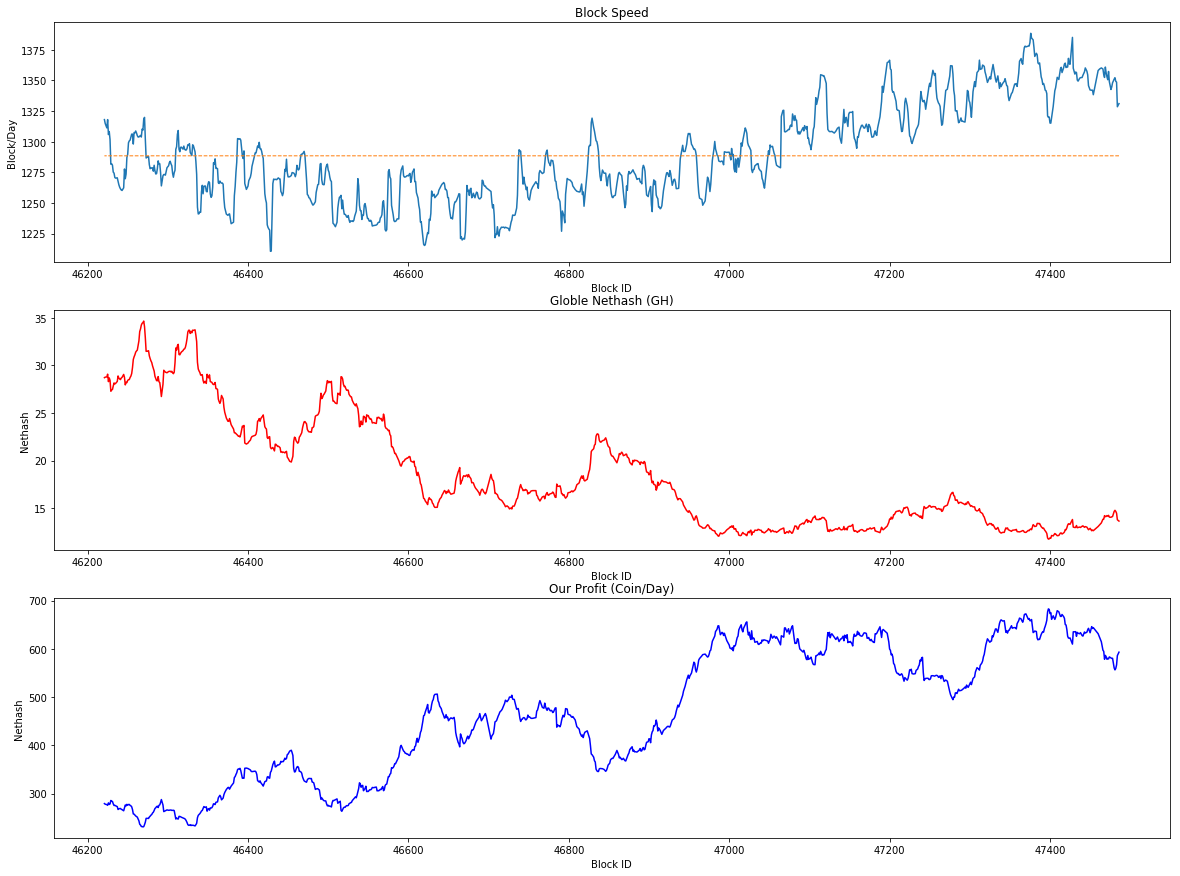

In [28]:
#df_block_rate_count
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['block_per_day'])
plt.plot(df_nethash_block_profit['height'], 
         [np.mean(df_nethash_block_profit['block_per_day'])]*df_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['nethash']/(10**9), color='red')
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_nethash_block_profit['height'], df_nethash_block_profit['profit'], color='blue')
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.show()
